<a href="https://colab.research.google.com/github/hungry4089/--1/blob/main/205655_%ED%99%A9%EC%8A%B9%ED%98%84_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install koreanize-matplotlib  #한글설치

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 34.4 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.preprocessing import MinMaxScaler

import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

데이터 불러오기

In [ ]:
uploaded = files.upload()

Saving Finddust1.csv to Finddust1.csv


CSV 파일을 읽어 pandas 데이터프레임으로 변환

In [ ]:
data = pd.read_csv('Finddust1.csv',engine='python',encoding='cp949')
data.head(5)  #앞 5행 보기

,date,Temp_seoul,Rain_seoul,Windspeed_seoul,Winddirection_seoul,Humidity_seoul,Localpressure_seoul,Sealevelpressure_seoul,Sunshine_seoul,Insolation_seoul,...,Rain_ansan,Humidity_ansan,ansan_PM10,WestSeoul_TG_out,WestSeoul_TG_in,Seoul_TG_out,Seoul_TG_in,Gunja_TG_out,Genja_TG_in,seoul_PM10
0,2017-01-01 0:00,0.2,0.0,2.2,20,79,1018.8,1029.7,0.0,0.0,...,0.0,98.7,60,1604,1264,2251,1814,817,739,71
1,2017-01-01 1:00,0.0,0.0,1.4,20,78,1018.9,1029.9,0.0,0.0,...,0.0,98.4,62,1720,1214,2950,2001,678,754,70
2,2017-01-01 2:00,-0.3,0.0,1.9,50,81,1018.5,1029.4,0.0,0.0,...,0.0,99.1,59,1266,761,1959,1083,464,410,71
3,2017-01-01 3:00,-0.7,0.0,2.0,50,84,1018.8,1029.8,0.0,0.0,...,0.0,99.3,61,897,485,939,775,385,385,66
4,2017-01-01 4:00,-1.1,0.0,1.6,20,85,1018.6,1029.6,0.0,0.0,...,0.0,98.7,63,925,464,844,710,313,492,64


In [ ]:
#오브젝트인 날짜 데이터와 서울의 정보가 아닌 1번 열과 14번째부터 49번째 열 제거
drop_col = [0] + list(range(14, 49))
data = data.drop(data.columns[drop_col], axis=1)  #axis=1 열을 기준으로 행을 따라 연산
data

,Temp_seoul,Rain_seoul,Windspeed_seoul,Winddirection_seoul,Humidity_seoul,Localpressure_seoul,Sealevelpressure_seoul,Sunshine_seoul,Insolation_seoul,Snowfall_seoul,Ozone_seoul,NO2_seoul,CO_seoul,seoul_PM10
0,0.2,0.0,2.2,20,79,1018.8,1029.7,0.0,0.0,0.0,0.002,0.054,0.9,71
1,0.0,0.0,1.4,20,78,1018.9,1029.9,0.0,0.0,0.0,0.002,0.052,0.9,70
2,-0.3,0.0,1.9,50,81,1018.5,1029.4,0.0,0.0,0.0,0.002,0.050,0.9,71
3,-0.7,0.0,2.0,50,84,1018.8,1029.8,0.0,0.0,0.0,0.002,0.047,0.9,66
4,-1.1,0.0,1.6,20,85,1018.6,1029.6,0.0,0.0,0.0,0.002,0.047,0.9,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,-3.1,0.0,2.1,270,43,1025.5,1036.6,0.0,0.0,0.0,0.006,0.046,0.6,34
17516,-3.7,0.0,0.8,340,39,1024.9,1036.1,0.0,0.0,0.0,0.003,0.049,0.6,34
17517,-4.6,0.0,1.1,290,44,1024.8,1036.0,0.0,0.0,0.0,0.002,0.048,0.6,34
17518,-5.4,0.0,1.3,270,46,1024.4,1035.6,0.0,0.0,0.0,0.002,0.049,0.7,35


데이터 유형 확인

In [ ]:
data.dtypes #정수형-int64, 실수형-float64, 오브젝트형-object

Temp_seoul                float64
Rain_seoul                float64
Windspeed_seoul           float64
Winddirection_seoul         int64
Humidity_seoul              int64
Localpressure_seoul       float64
Sealevelpressure_seoul    float64
Sunshine_seoul            float64
Insolation_seoul          float64
Snowfall_seoul            float64
Ozone_seoul               float64
NO2_seoul                 float64
CO_seoul                  float64
seoul_PM10                  int64
dtype: object

속성별로 결측치(빈 데이터)가 있는지 확인

In [ ]:
data.isnull().sum().sort_values(ascending=False)

Temp_seoul                0
Rain_seoul                0
Windspeed_seoul           0
Winddirection_seoul       0
Humidity_seoul            0
Localpressure_seoul       0
Sealevelpressure_seoul    0
Sunshine_seoul            0
Insolation_seoul          0
Snowfall_seoul            0
Ozone_seoul               0
NO2_seoul                 0
CO_seoul                  0
seoul_PM10                0
dtype: int64

각 정보별 특징을 더 자세히 출력

In [ ]:
data.describe()

,Temp_seoul,Rain_seoul,Windspeed_seoul,Winddirection_seoul,Humidity_seoul,Localpressure_seoul,Sealevelpressure_seoul,Sunshine_seoul,Insolation_seoul,Snowfall_seoul,Ozone_seoul,NO2_seoul,CO_seoul,seoul_PM10
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,13.030068,0.143682,1.967192,197.941210,57.617523,1006.400702,1016.678847,0.298567,0.551635,0.073311,0.020007,0.038648,0.519269,40.184532
std,11.630306,1.266955,1.159369,111.397989,20.097158,7.950707,8.396865,0.430517,0.834786,0.461657,0.016269,0.018356,0.225055,24.686770
min,-17.800000,0.000000,0.000000,0.000000,7.000000,980.800000,990.300000,0.000000,0.000000,0.000000,0.001000,0.004000,0.100000,4.000000
25%,3.400000,0.000000,1.100000,70.000000,42.000000,1000.100000,1009.900000,0.000000,0.000000,0.000000,0.007000,0.024000,0.400000,23.000000
50%,14.250000,0.000000,1.800000,250.000000,57.000000,1006.400000,1016.700000,0.000000,0.020000,0.000000,0.017000,0.037000,0.500000,35.000000
75%,22.800000,0.000000,2.700000,290.000000,73.000000,1012.600000,1023.300000,0.800000,0.910000,0.000000,0.028000,0.051000,0.600000,52.000000
max,39.400000,50.500000,8.000000,360.000000,100.000000,1028.300000,1039.600000,1.000000,3.520000,8.800000,0.149000,0.152000,2.600000,160.000000


**각 항목이 어느 정도의 상관 관계를 가지고 있는지 그래프로 표현**

---


vmax=0.3:0.3 이상일수록 어두운색으로 표시

sns.heatmap(): seaborn 라이브러리의 히트맵 함수. 데이터프레임의 각 항목들 간의 상관 관계시각화

data.corr(): 데이터프레임의 각 항목들 간의 상관 관계를 행렬로계산

linewidths=0.1: 히트맵의 셀 간의 경계선의 너비를 0.1로 설정

cmap=plt.cm.BuGn: 색상 맵의 색상지정

linecolor='white': 히트맵의 셀 간의 경계선 색상지정

annot=True: 히트맵의 각 셀에 숫자 값을 표시(True)

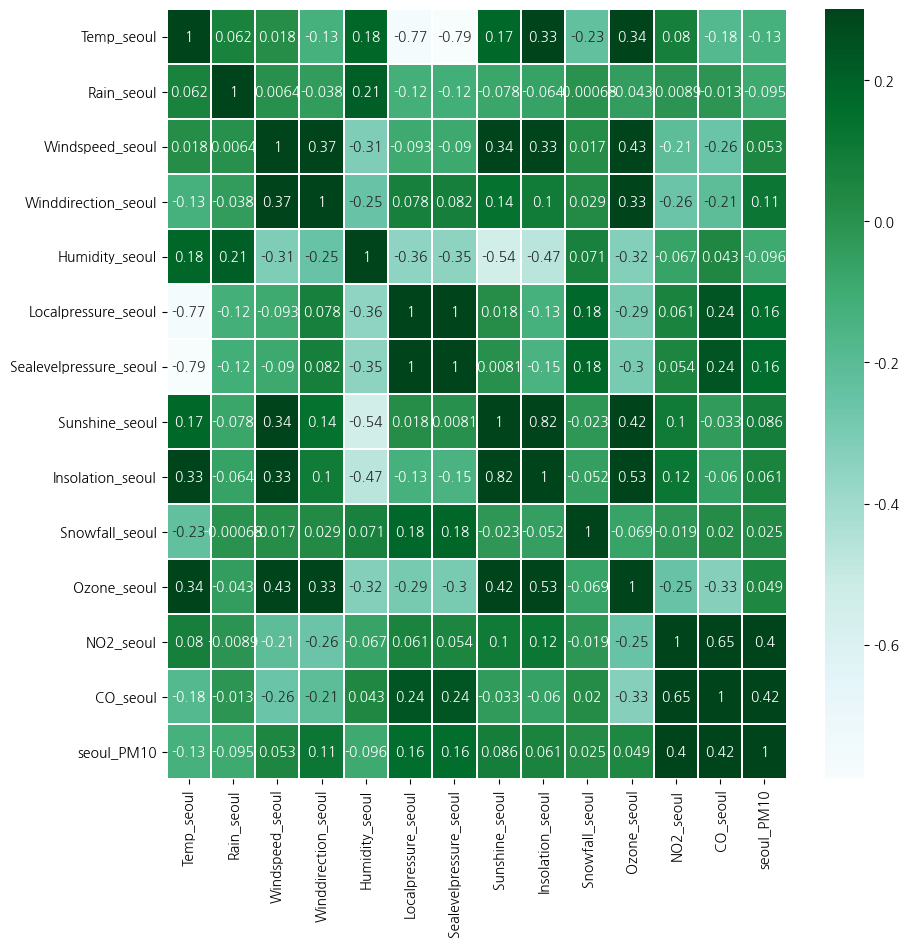

In [ ]:
plt.figure(figsize=(10,10)) #그래프 크기 지정
sns.heatmap(data.corr(),linewidths=0.1,vmax=0.3, cmap=plt.cm.BuGn, linecolor='white', annot=True)
plt.show()  #화면에 출력

서울 미세먼지와 관련이 큰 것부터 내림차순으로 저장

In [ ]:
data_imp=data.corr().sort_values('seoul_PM10', ascending=False)
data_imp['seoul_PM10']  #서울 미세먼지와 관련도 출력

seoul_PM10                1.000000
CO_seoul                  0.415440
NO2_seoul                 0.398453
Sealevelpressure_seoul    0.156766
Localpressure_seoul       0.156294
Winddirection_seoul       0.113231
Sunshine_seoul            0.086178
Insolation_seoul          0.060747
Windspeed_seoul           0.052695
Ozone_seoul               0.048604
Snowfall_seoul            0.024658
Rain_seoul               -0.094781
Humidity_seoul           -0.095524
Temp_seoul               -0.128993
Name: seoul_PM10, dtype: float64

미세먼지와 관련도가 0.1보다 높은 속성(일산화탄소(CO), 이산화질소(NO2), 해면기압, 지상압력, 풍향)들을 추출한 상관도 그래프

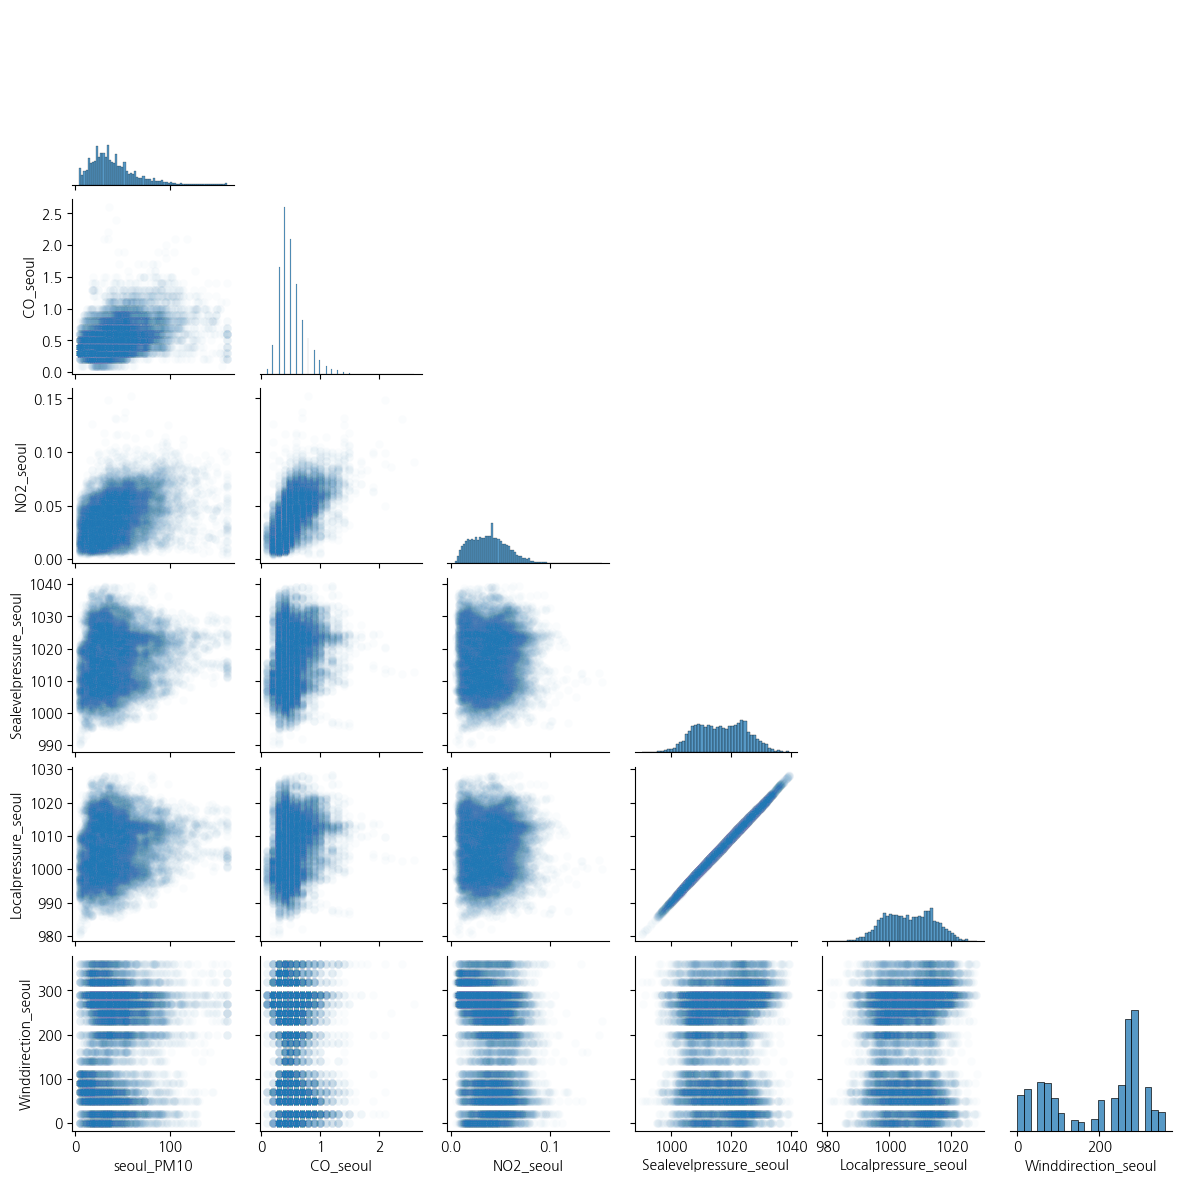

In [ ]:
sns.pairplot(data[['seoul_PM10','CO_seoul','NO2_seoul','Sealevelpressure_seoul','Localpressure_seoul','Winddirection_seoul']],\
             corner=True, height=2, plot_kws={'alpha':0.02})   #corner대각선 기준한쪽만 남김, height-크기, alpha-투명도(겹치는 부분 확인)
plt.show()

In [ ]:
x_data=data[['CO_seoul','NO2_seoul','Sealevelpressure_seoul','Localpressure_seoul','Winddirection_seoul']] #미세먼지를 제외한 나머지값 저장
y_data = data['seoul_PM10'].values #배열로 미세먼지값 저장
x_data

,CO_seoul,NO2_seoul,Sealevelpressure_seoul,Localpressure_seoul,Winddirection_seoul
0,0.9,0.054,1029.7,1018.8,20
1,0.9,0.052,1029.9,1018.9,20
2,0.9,0.050,1029.4,1018.5,50
3,0.9,0.047,1029.8,1018.8,50
4,0.9,0.047,1029.6,1018.6,20
...,...,...,...,...,...
17515,0.6,0.046,1036.6,1025.5,270
17516,0.6,0.049,1036.1,1024.9,340
17517,0.6,0.048,1036.0,1024.8,290
17518,0.7,0.049,1035.6,1024.4,270


데이터 전처리(정규화)

In [ ]:
scaler = MinMaxScaler() # 데이터를 최소값과 최대값을 기준으로 0과 1사이의 값으로 변환
X_scaled = scaler.fit_transform(x_data) # 입력데이터를 MinMaxScaler으로 스케일링
X_scaled

array([[0.32      , 0.33783784, 0.79918864, 0.8       , 0.05555556],
       [0.32      , 0.32432432, 0.80324544, 0.80210526, 0.05555556],
       [0.32      , 0.31081081, 0.79310345, 0.79368421, 0.13888889],
       ...,
       [0.2       , 0.2972973 , 0.92697769, 0.92631579, 0.80555556],
       [0.24      , 0.30405405, 0.9188641 , 0.91789474, 0.75      ],
       [0.2       , 0.2972973 , 0.92292089, 0.92210526, 0.88888889]])

전체의 90%를 학습셋으로, 10%를 테스트셋으로 지정

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(15768, 5) (15768,) (1752, 5) (1752,)


모델 구조 생성

In [ ]:
model = Sequential()                                                #Sequential: 층(layer)을 순차적으로 쌓아서 신경망 모델을 만드는 방식
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) #노드(은닉층)의 수:64개, 입력층:입력 데이터 열의 수(5개), 활성화 함수-relu
model.add(Dense(32, activation='relu'))                             #노드(은닉층)의 수:32개, relu:0보다 크면 그대로, 0이하일땐 0, 출력 범위: (0, ∞)
model.add(Dense(16, activation='relu'))                             #노드(은닉층)의 수:16개
model.add(Dense(1))                                                 #출력층:학습에 대한 예측값
model.summary()                                                     #모델의 각 층(layer)에 대한 정보를 요약

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                384       
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


모델 실행

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True) # val_loss가 50번 이상 좋아지지 않는다면 조기종료(과적합 방지)
checkpoint = ModelCheckpoint(filepath="saved_models", monitor='val_loss', verbose=1, save_best_only=True)#학습 과정 중 가장 좋은 성능의 모델을 저장

# 모델 훈련
history = model.fit(X_train, y_train, validation_split=0.3, epochs=1000, batch_size=32, callbacks=[early_stopping_callback, checkpoint])

Epoch 1/1000
334/345 [============================>.] - ETA: 0s - loss: 634.6554 - mse: 634.6554
Epoch 1: val_loss improved from inf to 606.46497, saving model to saved_models
345/345 [==============================] - 3s 5ms/step - loss: 636.2045 - mse: 636.2045 - val_loss: 606.4650 - val_mse: 606.4650
Epoch 2/1000
327/345 [===========================>..] - ETA: 0s - loss: 633.2433 - mse: 633.2433
Epoch 2: val_loss improved from 606.46497 to 603.41980, saving model to saved_models
345/345 [==============================] - 2s 5ms/step - loss: 636.3398 - mse: 636.3398 - val_loss: 603.4198 - val_mse: 603.4198
Epoch 3/1000
335/345 [============================>.] - ETA: 0s - loss: 617.9284 - mse: 617.9284
Epoch 3: val_loss improved from 603.41980 to 555.73334, saving model to saved_models
345/345 [==============================] - 2s 5ms/step - loss: 618.9379 - mse: 618.9379 - val_loss: 555.7333 - val_mse: 555.7333
Epoch 4/1000
326/345 [===========================>..] - ETA: 0s - loss: 6

손실값 시각화

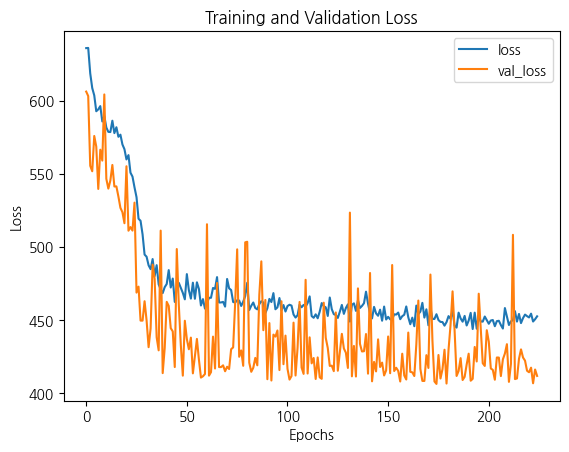

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

지금까지 학습한 모델로 검증 데이터에 대한 예측 수행

55/55 [==============================] - 0s 1ms/step


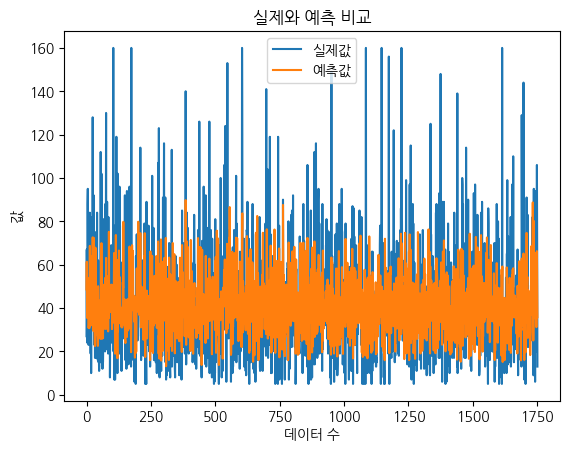

In [ ]:
prediction=model.predict(X_test)
plt.plot(y_test, label='실제값')
plt.plot(prediction, label='예측값')
plt.title('실제와 예측 비교')
plt.xlabel('데이터 수')
plt.ylabel('값')
plt.legend()
plt.show()

데이터가 너무 많으니 마지막 부분 값만 출력

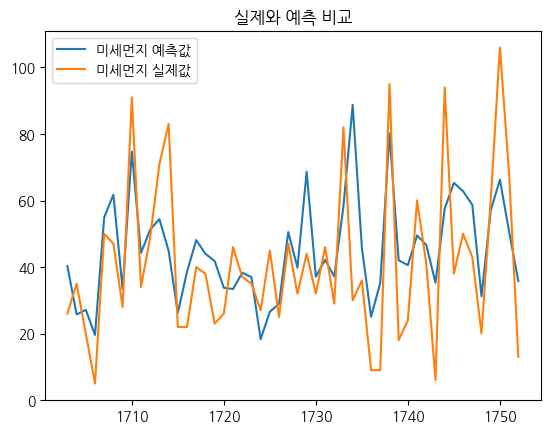

In [ ]:
real_prices =[]   #실제 값 리스트 생성
pred_prices = []  #예측 값 리스트 생성
X_num = []        #실행 번호 리스트 생성
repet=50          #출력 갯수 설정
num = len(y_test)-repet

for i in range(repet):                                  #반복문
    real = y_test[len(y_test)-repet+i]                  #실제 결과값 리스트에서 값 호출
    predictions = prediction[len(y_test)-repet+i]       #예측 결과값 리스트에서 값 호출
    real_prices.append(real)                            #real 값을 real_prices 리스트에 추가
    pred_prices.append(predictions)                      #prediction값을 pred_prices 리스트에 추가
    num = num + 1
    X_num.append(num)

# 그래프를 통해 샘플로 뽑은 50개의 값을 비교
plt.plot(X_num, pred_prices, label='미세먼지 예측값')   #주어진 데이터 시퀀스를 사용하여 선 그래프 출력.(x축, y축, 제목)
plt.plot(X_num, real_prices, label='미세먼지 실제값')
plt.title('실제와 예측 비교')
plt.legend()
plt.show()